# Bike sharing

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bike_sharing_model.csv')

In [3]:
df.shape

(12226, 15)

In [4]:
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
6865,11061,2012-04-11,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,30
9064,2169,2011-04-05,2,0,4,5,0,2,1,3,0.46,0.4545,0.94,0.2985,5
11381,15828,2012-10-26,4,1,10,16,0,5,1,2,0.58,0.5455,0.73,0.1642,582
8311,17260,2012-12-27,1,1,12,0,0,4,1,3,0.26,0.2273,0.87,0.2985,3
4251,5229,2011-08-10,3,0,8,18,0,3,1,1,0.82,0.7121,0.28,0.2985,559
6075,6435,2011-09-30,4,0,9,16,0,5,1,1,0.62,0.6212,0.53,0.2239,360
4345,2894,2011-05-05,2,0,5,11,0,4,1,1,0.52,0.5000,0.36,0.4478,148
2563,10250,2012-03-08,1,1,3,3,0,4,1,1,0.46,0.4545,0.63,0.3881,3
8123,742,2011-02-03,1,0,2,7,0,4,1,1,0.14,0.1212,0.50,0.3284,87
4466,17023,2012-12-17,4,1,12,1,0,1,1,2,0.38,0.3939,0.87,0.1045,15


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Split categorical/continuos variables

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [8]:
df_categorical=df[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df_categorical.head()

,season,mnth,hr,yr,holiday,weekday,workingday,weathersit
0,3,9,7,0,0,6,0,2
1,1,1,10,1,1,1,0,2
2,3,8,16,0,0,2,1,1
3,4,11,9,1,0,2,1,3
4,3,8,18,0,0,1,1,1


In [9]:
df_numerical=df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
df_numerical.head()

,temp,atemp,hum,windspeed,cnt
0,0.46,0.4545,0.77,0.1940,37
1,0.14,0.1364,0.59,0.1940,126
2,0.72,0.6515,0.32,0.1343,444
3,0.32,0.3030,0.81,0.3284,110
4,0.70,0.6515,0.65,0.1940,483


## Categorical data

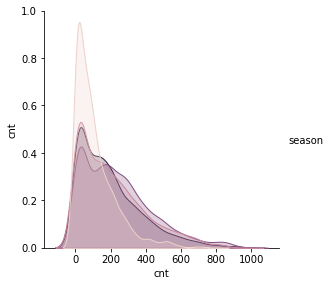

In [10]:
sns.pairplot(data=df[["season","cnt"]], hue="season", height=4)

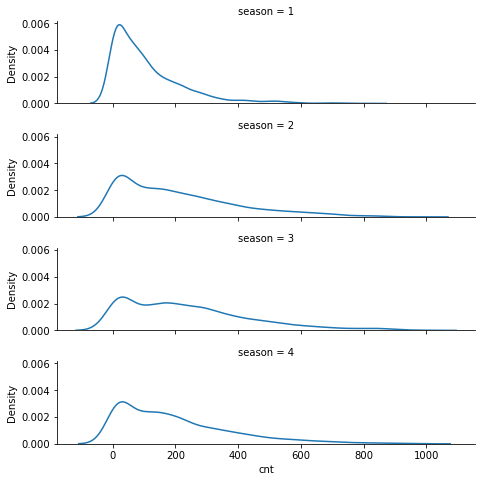

In [11]:
g = sns.FacetGrid(df, row="season", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "cnt")

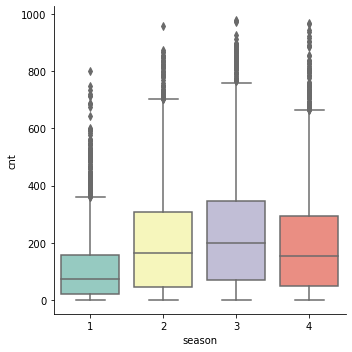

In [12]:
sns.catplot(data=df, x="season", y="cnt",kind="box", palette="Set3")

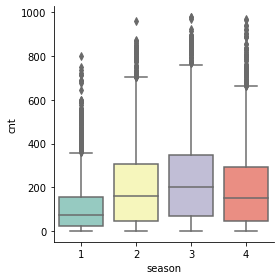

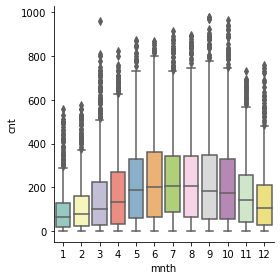

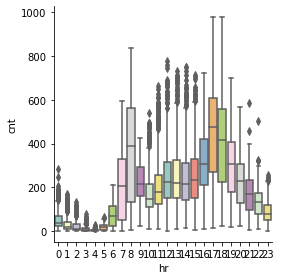

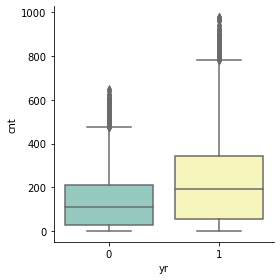

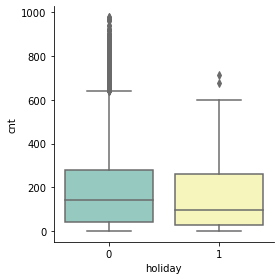

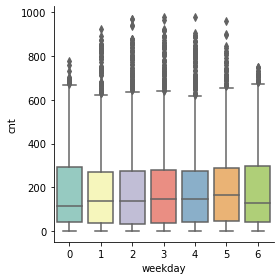

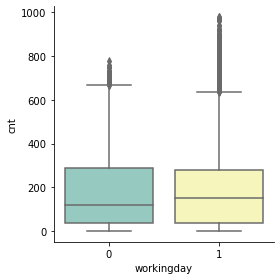

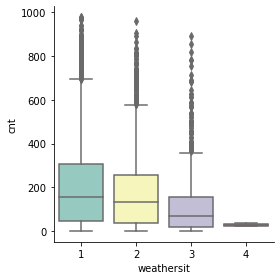

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="cnt",
            kind="box", palette="Set3",height=4);
plt.show()



In [14]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


## Numerical data

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>]],
      dtype=object)

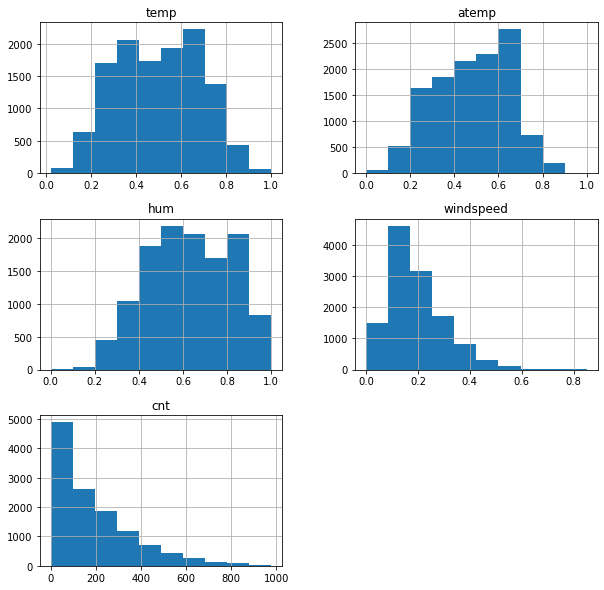

In [15]:
df_numerical.hist(figsize=(10,10))

In [16]:
import math
df_numerical['log_cnt']=df_numerical['cnt'].apply(lambda x: math.log(x+1))

/tmp/ipykernel_249919/2982343764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['log_cnt']=df_numerical['cnt'].apply(lambda x: math.log(x+1))


array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'log_cnt'}>]], dtype=object)

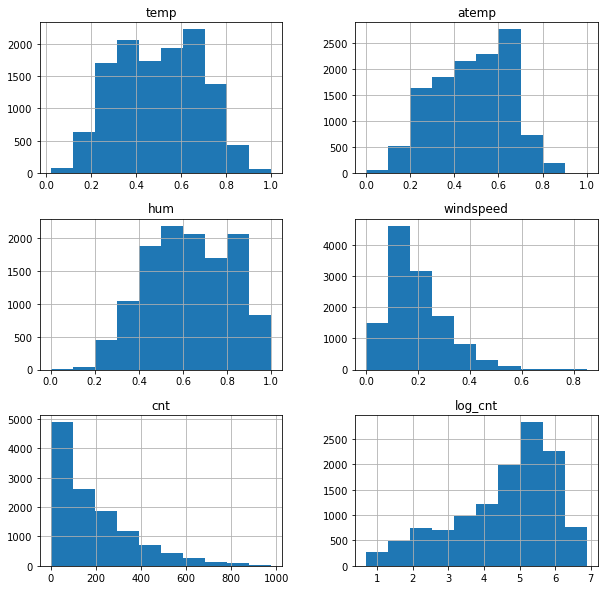

In [17]:
df_numerical.hist(figsize=(10,10))

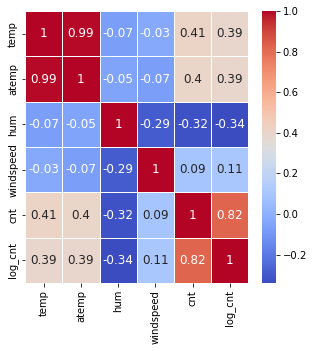

In [18]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (5,5))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

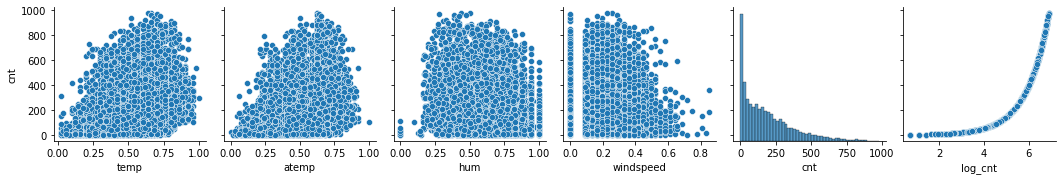

In [19]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='cnt')

In [20]:
df_numerical=df_numerical.drop(["temp"], axis=1)

In [21]:
X_numerical=df_numerical.iloc[:,:-2]

In [22]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12226, 49)
(12226, 3)


,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [23]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4,atemp,hum,windspeed
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.5758,0.83,0.0896
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0.5606,0.83,0.2836
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.4697,0.72,0.0000
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.4697,0.29,0.2985
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.6364,0.89,0.1642


In [24]:
X.columns

Index(['season_2', 'season_3', 'season_4', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'yr_1',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'atemp', 'hum', 'windspeed'],
      dtype='object')

### Separate Train/Test sets


In [25]:
y=df['cnt'].apply(lambda x: math.log(x+1))

In [26]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8558, 52) (3668, 52)


In [27]:
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test) 

## Models

In [28]:
from sklearn.model_selection import GridSearchCV
import math

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.446608 using {}

MAE  train 0.443 (62.264533)  test 0.445 (63.559296)
MSE  train 0.345              test 0.348
RMSE train 0.588              test 0.590
r2   train 0.830              test 0.823


In [30]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.446614 using {'alpha': 0.001}

MAE  train 0.443 (62.268319)  test 0.445 (63.564675)
MSE  train 0.345              test 0.348
RMSE train 0.588              test 0.590
r2   train 0.830              test 0.823


In [31]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.451584 using {'alpha': 0.001}

MAE  train 0.448 (62.759797)  test 0.450 (64.021507)
MSE  train 0.350              test 0.354
RMSE train 0.592              test 0.595
r2   train 0.828              test 0.820


In [32]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.728433 using {'n_neighbors': 20, 'p': 1}

MAE  train 0.641 (84.788834)  test 0.671 (90.264553)
MSE  train 0.677              test 0.737
RMSE train 0.823              test 0.859
r2   train 0.667              test 0.625


In [33]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,18), 
              "min_samples_leaf": np.arange(5,8)}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.434390 using {'max_depth': 17, 'min_samples_leaf': 5}

MAE  train 0.327 (48.048567)  test 0.403 (57.132567)
MSE  train 0.222              test 0.319
RMSE train 0.472              test 0.565
r2   train 0.891              test 0.838


In [34]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['mse'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.410250 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}

MAE  train 0.328 (46.642552)  test 0.373 (54.585052)
MSE  train 0.214              test 0.270
RMSE train 0.462              test 0.520
r2   train 0.895              test 0.863


In [35]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear'], #,'poly'
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.426863 using {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}

MAE  train 0.422 (58.617104)  test 0.426 (60.253171)
MSE  train 0.389              test 0.392
RMSE train 0.624              test 0.626
r2   train 0.809              test 0.801


In [36]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.235918 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 0.225 (31.437138)  test 0.227 (32.507943)
MSE  train 0.104              test 0.107
RMSE train 0.323              test 0.327
r2   train 0.949              test 0.946


In [37]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.778822 using {'learning_rate': 2, 'loss': 'square', 'n_estimators': 100, 'random_state': 0}

MAE  train 0.719 (89.961519)  test 0.718 (92.039470)
MSE  train 0.968              test 0.949
RMSE train 0.984              test 0.974
r2   train 0.524              test 0.518


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[20,50,100], "learning_rate":[0.01, 0.1,1,10], 
              "random_state" : [10] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.287548 using {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 100, 'random_state': 10}

MAE  train 0.262 (33.922324)  test 0.267 (35.045940)
MSE  train 0.141              test 0.148
RMSE train 0.376              test 0.384
r2   train 0.931              test 0.925


## Choice of a model

In [39]:
#retrain in the entire dataset

mlp = MLPRegressor(alpha=0.1, batch_size=20, hidden_layer_sizes=(20,10,5), learning_rate='constant', max_iter=5000, solver='sgd')
mlp.fit(X,y)

MLPRegressor(alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5),
             max_iter=5000, solver='sgd')

In [40]:
y_pred=mlp.predict(X)
error=y-y_pred


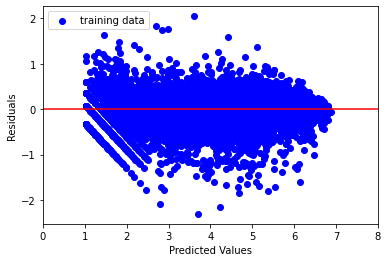

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=8, color="r")
plt.xlim([0,8])
plt.show()

In [42]:
#from sklearn.preprocessing import StandardScaler

#nb_error = np.array(error).flatten()

#error = np.array(error).reshape(-1,1)
#scaled_error= StandardScaler(copy=False).fit(error).transform(error).flatten()

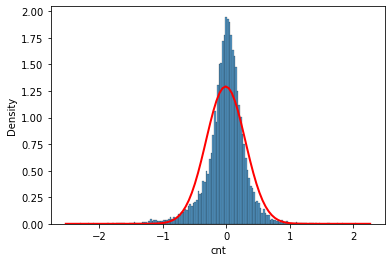

In [43]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns

#dist = getattr(scipy.stats, 'norm')
#param = dist.fit(error)

err_mean=error.mean()
err_std=error.std()

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
#test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error))


# plot the distribution and compare with a normal

ax = sns.histplot(error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
#ax.legend() 

#plt.hist(nb_error,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [44]:
import pickle
pickle.dump(mlp, open('mlp_model.pkl', 'wb'))

## Model Interpretation

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(X_train,columns=X.columns)


In [46]:
!pip install shap

100%|██████████| 8558/8558 [18:21<00:00,  7.77it/s]


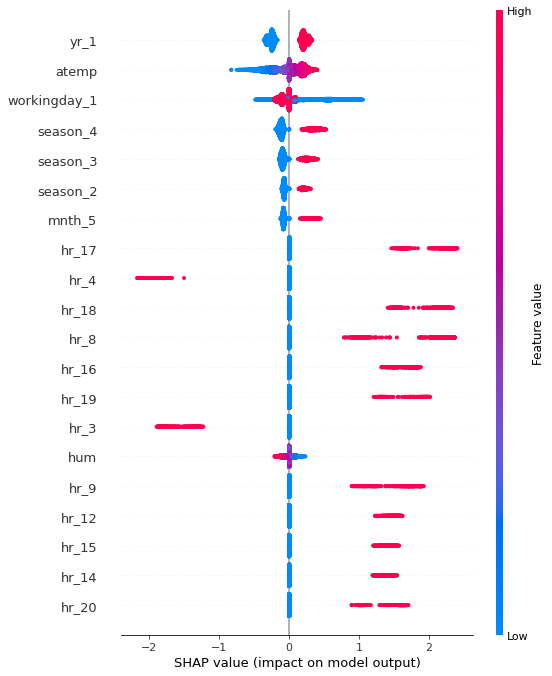

In [47]:
import shap

X_train_summary = shap.kmeans(X_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(mlp.predict, X_train_summary)
shap_values = explainer.shap_values(df_X_train)
shap.summary_plot(shap_values, df_X_train)

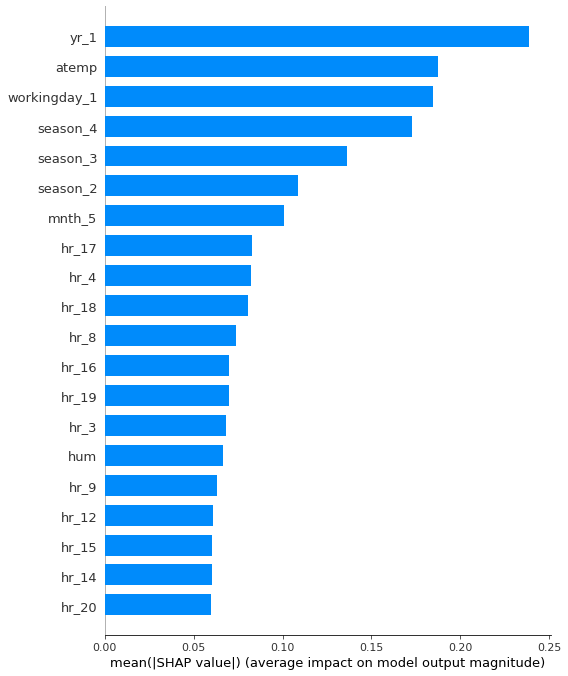

In [48]:
shap.summary_plot(shap_values, df_X_train, plot_type="bar")

# Making the predictions

In [49]:
df2 = pd.read_csv('bike_sharing_predictions.csv')

In [50]:
df2_categorical=df2[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df2_numerical=df2[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(["temp"], axis=1)

#scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
#scaled_df2.columns = df2_numerical.columns

X2_numerical=df2_numerical.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2_numerical['cnt'].apply(lambda x: math.log(x+1))

In [51]:
# load model
loaded_model = pickle.load(open('mlp_model.pkl', 'rb'))

#model.fit(X_train,y_train)
# we could retrain with the entire dataset

y2_predictions=loaded_model.predict(X2)

In [52]:
from sklearn import metrics

print("MAE  train %.3f"  % (metrics.mean_absolute_error(y2, y2_predictions)) ) 
print("MSE  train %.3f " % (metrics.mean_squared_error(y2, y2_predictions)) ) 
print("RMSE train %.3f " % (np.sqrt(metrics.mean_squared_error(y2, y2_predictions))) ) 
print("r2   train %.3f " % (metrics.r2_score(y2, y2_predictions)) )


MAE  train 0.224
MSE  train 0.103 
RMSE train 0.321 
r2   train 0.949 


In [53]:
y2_predictions_exp = np.exp(y2_predictions)-1
print(y2_predictions_exp)

[203.91773755 175.21209488 484.85559224 ... 141.11568486 250.15145671
 118.45138076]


In [54]:
np.savetxt("model_predictions.csv", y2_predictions_exp.astype(int), delimiter=",", fmt='%.0f')